In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Silhouette scores
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def sil_score(X, k_candidates, random_seed=324):
    scores = []
    for k in k_candidates:
        km = KMeans(n_clusters=k, random_state=random_seed)
        cluster_labels = km.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters = {} the average silhouette_score is: {}'.format(k, silhouette_avg))
        scores.append(silhouette_avg)
    
    optimal_k = k_candidates[np.argmax(scores)]
    print(f"\nOptimal k={optimal_k}")
    return optimal_k

In [3]:
# elbow method
def elbow(X, k_candidates, random_seed=324):
    inertias = []
    for k in k_candidates:
        model = KMeans(n_clusters=k, random_state=random_seed, max_iter=500).fit(X)
        inertias.append(model.inertia_)

    plt.plot(k_candidates, inertias, '-o', color='black')
    plt.xlabel('Number of clusters, k')
    plt.ylabel('Inertia')
    plt.show()

In [4]:
from sklearn.decomposition import PCA
# Plot the explained variances
def explained_var(pca):
    plt.bar(range(len(pca.components_)), pca.explained_variance_ratio_.cumsum())
    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.title('PCA % Explained Variance')
    plt.show()

In [45]:
def visualize_optimal_kmeans(X, optimal_k):
    cluster_pred = KMeans(optimal_k, random_state=324, max_iter=500).fit_predict(X) # train kmeans
    pca = PCA(n_components=X.shape[1]).fit(X) # fit pca
    X_pca = pca.transform(X)

    plt.figure(figsize=(5,5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=.5, c=cluster_pred)
    plt.show()
    
    X_temp = X.copy()
    X_temp['Cluster'] = cluster_pred
    X_temp.groupby('Cluster').median().T.plot.bar(figsize=(15,6))
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.title(f'Neighborhood Profiles according to {optimal_k}-KMeans Clusters')
    
    return pca, X_temp.groupby('Cluster').median().T

In [6]:
K_CANDIDATES = range(2, 10)

# 1) KMeans unscaled

In [7]:
# load data
data = pd.read_csv('../data/Data_crimeUnscaled.csv', index_col=0)
X_unscaled = data.iloc[:, 1:]

X_unscaled.head()

,GardenCounts_MMscaled,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_UnderBach,Edu_Bachelor,Edu_GradProf,Crime_Felonies_unscaled,Crime_Misdemeanor_unscaled,Crime_Violation_unscaled,Crime_Total_unscaled
NTA,,,,,,,,,,,,,,,,,,,
Bath Beach,0.000000,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.030033,0.065645,0.014444,0.110123
Bay Ridge,0.000000,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.033627,0.082051,0.023833,0.139510
Bedford,0.638889,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.082026,0.124671,0.032993,0.239690
Bensonhurst East,0.027778,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.029377,0.048003,0.014969,0.092349
Bensonhurst West,0.055556,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.027704,0.045981,0.013105,0.086790


In [8]:
sil_score(X_unscaled, K_CANDIDATES)

For n_clusters = 2 the average silhouette_score is: 0.92149206692962
For n_clusters = 3 the average silhouette_score is: 0.3542816861599433
For n_clusters = 4 the average silhouette_score is: 0.3594748931247976
For n_clusters = 5 the average silhouette_score is: 0.36915189263228454
For n_clusters = 6 the average silhouette_score is: 0.3193252463021912
For n_clusters = 7 the average silhouette_score is: 0.33275502063093876
For n_clusters = 8 the average silhouette_score is: 0.33638603280386997
For n_clusters = 9 the average silhouette_score is: 0.3285126490233095

Optimal k=2


2

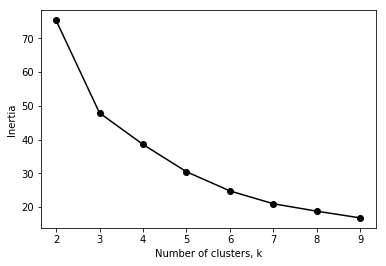

In [9]:
elbow(X_unscaled, K_CANDIDATES)
# seems like optimal_k=3

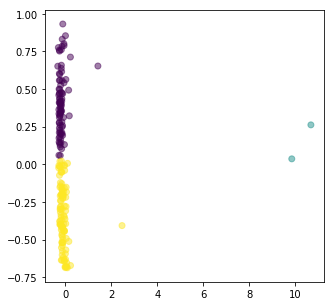

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

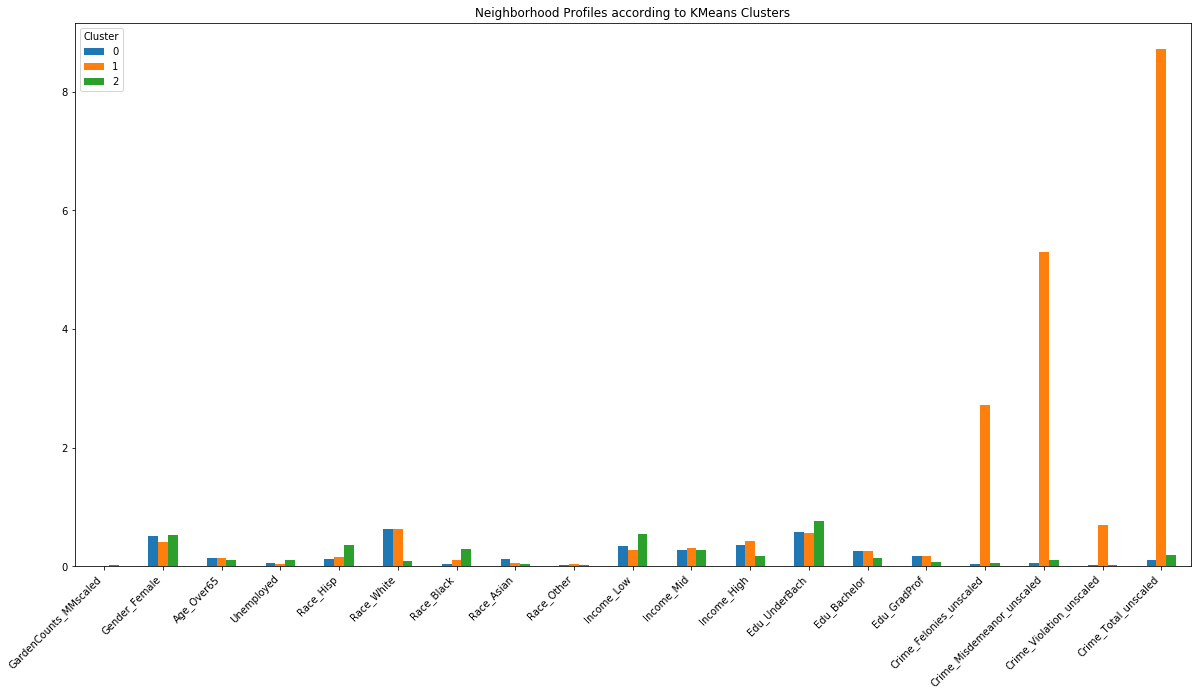

In [10]:
# using optimal_k=3
visualize_optimal_kmeans(X_unscaled, optimal_k=3)

# 2) KMeans for ACS + MinMaxScaled crime data

In [11]:
# load data
data = pd.read_csv('../data/Data_crimeMinMaxScaled.csv', index_col=0)
X_crimeMMscaled = data.iloc[:, 1:] # with crime MinMaxScaled

X_crimeMMscaled.head()

,GardenCounts_MMscaled,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_UnderBach,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,,
Bath Beach,0.000000,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.000000,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.011752,0.015232,0.027670,0.015315
Bedford,0.638889,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,0.027778,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,0.055556,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.009682,0.008536,0.015215,0.009528


In [12]:
# sil method
optimal_k = sil_score(X_crimeMMscaled, K_CANDIDATES)

For n_clusters = 2 the average silhouette_score is: 0.3595965878178352
For n_clusters = 3 the average silhouette_score is: 0.3583067559203228
For n_clusters = 4 the average silhouette_score is: 0.31013922494944157
For n_clusters = 5 the average silhouette_score is: 0.3306182283244411
For n_clusters = 6 the average silhouette_score is: 0.347676945736581
For n_clusters = 7 the average silhouette_score is: 0.3451640096552615
For n_clusters = 8 the average silhouette_score is: 0.3421695579313642
For n_clusters = 9 the average silhouette_score is: 0.31056908582084425

Optimal k=2


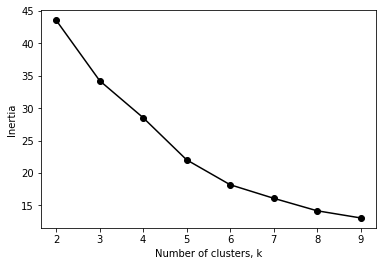

In [13]:
# elbow method
elbow(X_crimeMMscaled, K_CANDIDATES)
# unclear elbow point

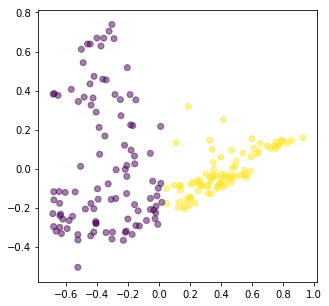

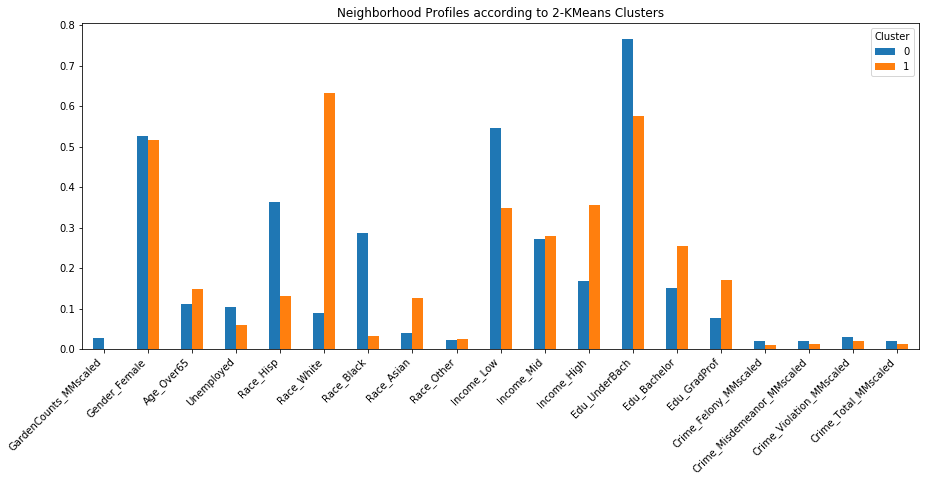

In [46]:
# k=2 seems to be with and without gardens
pca, profiles = visualize_optimal_kmeans(X_crimeMMscaled, optimal_k=2)

In [48]:
profiles.to_csv('../data/2KMeans_profile.csv')

In [39]:
pca.explained_variance_ratio_.cumsum()

array([0.49660721, 0.668915  , 0.7691714 , 0.84783836, 0.91161757,
       0.96194171, 0.98389209, 0.98927508, 0.99404947, 0.99590581,
       0.99773361, 0.9988115 , 0.99947543, 0.99995583, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

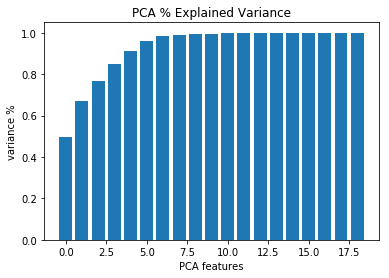

In [38]:
explained_var(pca) # 70%

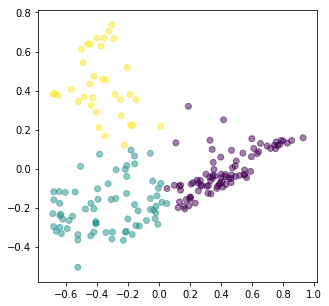

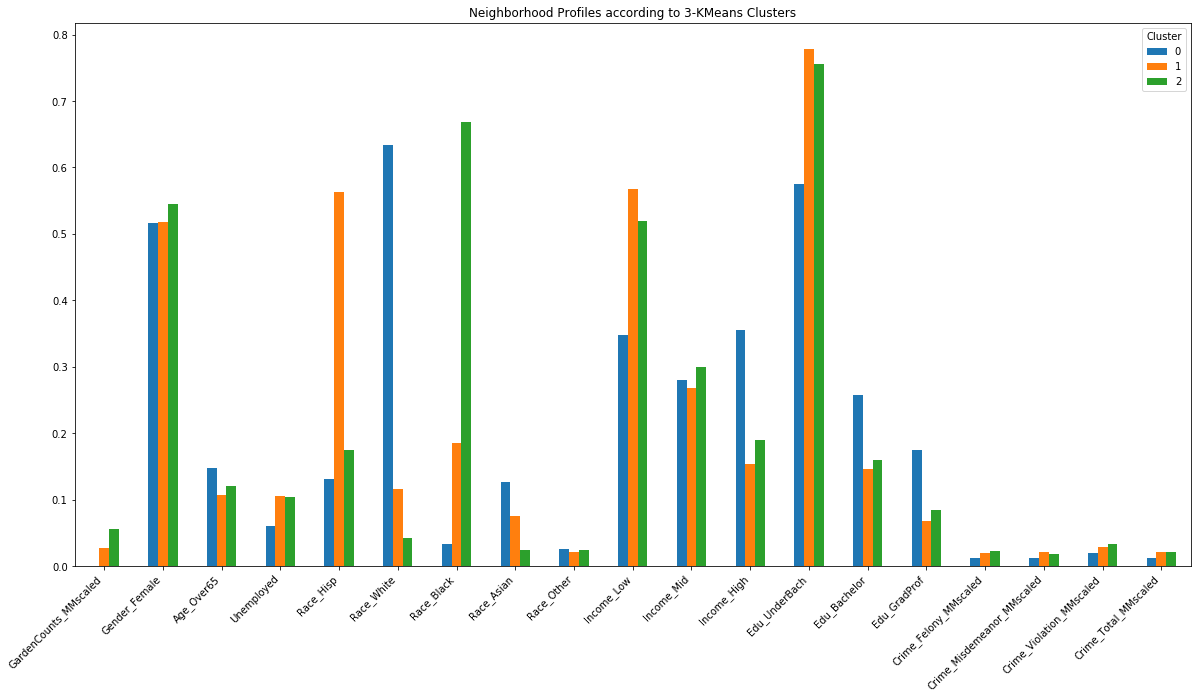

In [40]:
# k=3 seems to be no gardens, moderate num of gardens, high num of gardens
pca = visualize_optimal_kmeans(X_crimeMMscaled, optimal_k=3)

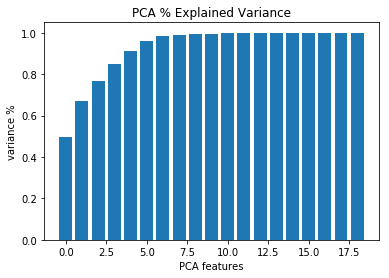

In [41]:
explained_var(pca) # 70%

In [42]:
pca.explained_variance_ratio_.cumsum()

array([0.49660721, 0.668915  , 0.7691714 , 0.84783836, 0.91161757,
       0.96194171, 0.98389209, 0.98927508, 0.99404947, 0.99590581,
       0.99773361, 0.9988115 , 0.99947543, 0.99995583, 1.        ,
       1.        , 1.        , 1.        , 1.        ])

# 3) Kmeans with all MinMaxScaled data 

In [18]:
# load data
data = pd.read_csv('../data/Data_allMinMaxScaled.csv', index_col=0)
X_allMMscaled = data.iloc[:, 2:] # with crime scaled

X_allMMscaled.head()

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felonies_unscaled,Crime_Misdemeanor_unscaled,Crime_Violation_unscaled,Crime_Total_unscaled
NTA,,,,,,,,,,,,,,,,,,
Bath Beach,0.439052,0.394840,0.323130,0.175535,0.458779,0.012549,0.508914,0.053256,0.448464,0.675263,0.373584,0.659842,0.433204,0.196127,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.566993,0.421496,0.343076,0.177737,0.667921,0.020197,0.204717,0.091593,0.412601,0.627940,0.430878,0.494148,0.549841,0.366046,0.011752,0.015232,0.027670,0.015315
Bedford,0.534108,0.188160,0.572512,0.196904,0.367317,0.448119,0.042294,0.074355,0.661452,0.365832,0.254953,0.678467,0.384149,0.208008,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,0.522524,0.423917,0.390147,0.112777,0.488679,0.008212,0.545174,0.067339,0.563712,0.636602,0.261058,0.704291,0.384671,0.165408,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,0.520255,0.380796,0.404529,0.139420,0.448015,0.008740,0.571102,0.054431,0.537315,0.613423,0.298855,0.755354,0.346044,0.115354,0.009682,0.008536,0.015215,0.009528


In [19]:
optimal_k = sil_score(X_allMMscaled, K_CANDIDATES)

For n_clusters = 2 the average silhouette_score is: 0.31656790036250787
For n_clusters = 3 the average silhouette_score is: 0.29084483834071656
For n_clusters = 4 the average silhouette_score is: 0.3229538882517212
For n_clusters = 5 the average silhouette_score is: 0.30984693735420454
For n_clusters = 6 the average silhouette_score is: 0.2904153718783435
For n_clusters = 7 the average silhouette_score is: 0.29794521978491384
For n_clusters = 8 the average silhouette_score is: 0.2958618321642213
For n_clusters = 9 the average silhouette_score is: 0.2688670799047167

Optimal k=4


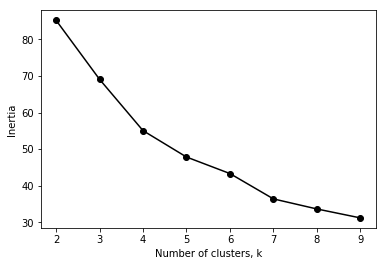

In [20]:
elbow(X_allMMscaled, K_CANDIDATES)

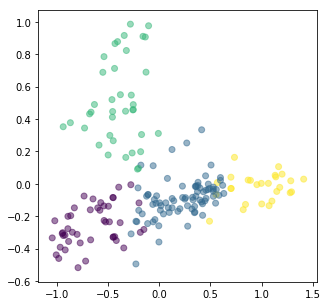

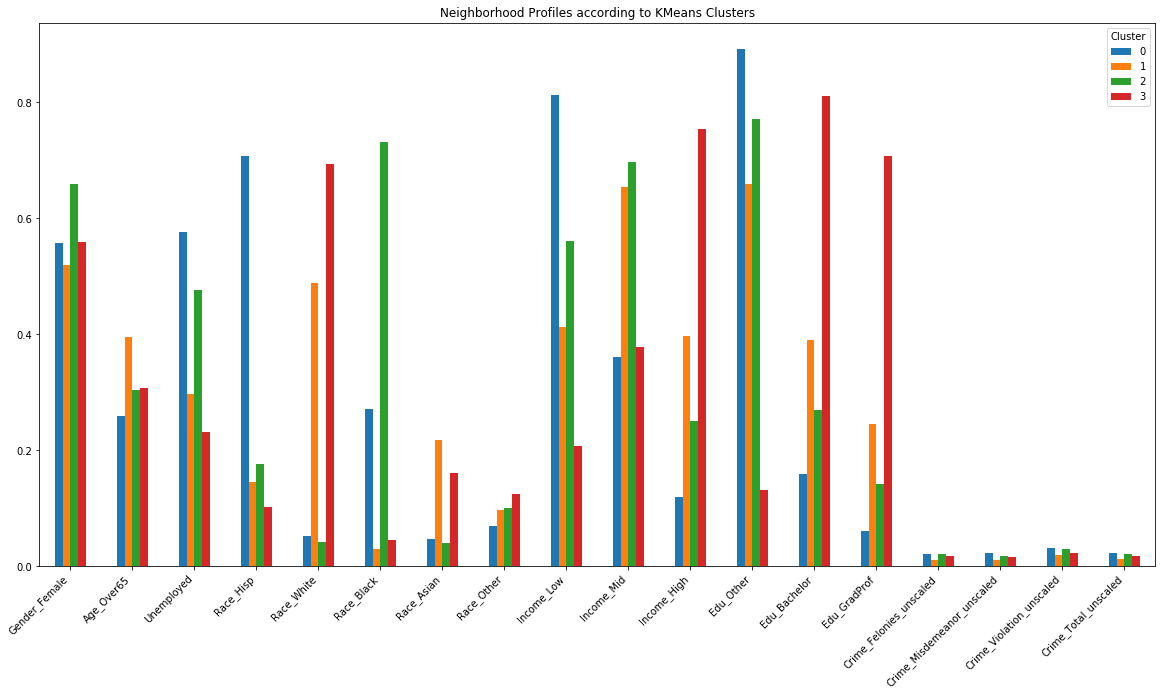

In [21]:
pca = visualize_optimal_kmeans(X_allMMscaled, optimal_k)

# neighborhood profiles don't look much better than when we only minmaxscaled crime

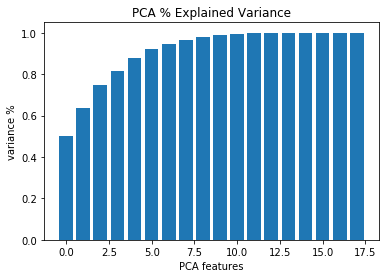

In [22]:
explained_var(pca)
# here the pca explains less than if we only minmaxscaled crime

# 4) KMeans of demographics only (without crime)

In [23]:
data = pd.read_csv('../data/Data_crimeMinMaxScaled.csv', index_col=0)
X_demo = data.iloc[:, 2:-4]
X_demo.head()

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_UnderBach,Edu_Bachelor,Edu_GradProf
NTA,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829
Bay Ridge,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289
Bedford,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455
Bensonhurst East,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283
Bensonhurst West,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582


In [24]:
optimal_k = sil_score(X_demo, K_CANDIDATES)

For n_clusters = 2 the average silhouette_score is: 0.3908168810410699
For n_clusters = 3 the average silhouette_score is: 0.4007317044467203
For n_clusters = 4 the average silhouette_score is: 0.3629960415035128
For n_clusters = 5 the average silhouette_score is: 0.3790221710112364
For n_clusters = 6 the average silhouette_score is: 0.36900602556540957
For n_clusters = 7 the average silhouette_score is: 0.342343385279898
For n_clusters = 8 the average silhouette_score is: 0.33988372453654153
For n_clusters = 9 the average silhouette_score is: 0.3253562804642598

Optimal k=3


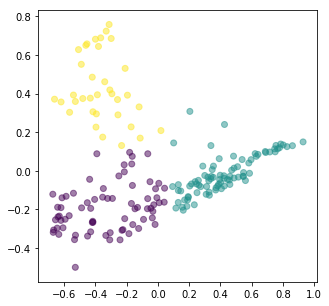

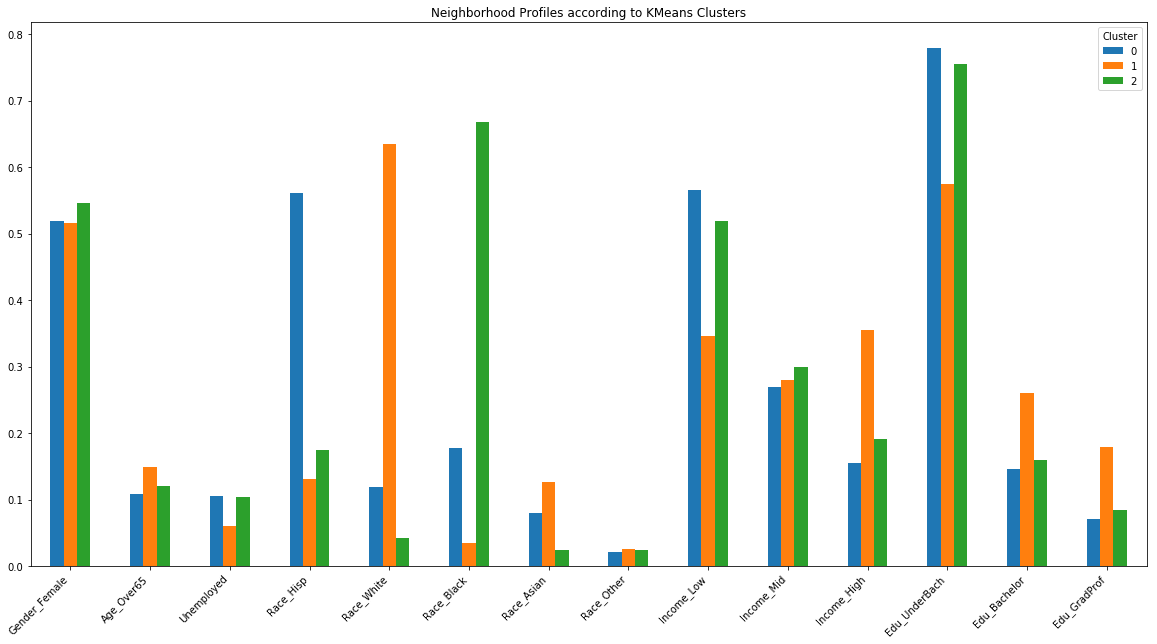

In [25]:
pca = visualize_optimal_kmeans(X_demo, optimal_k)

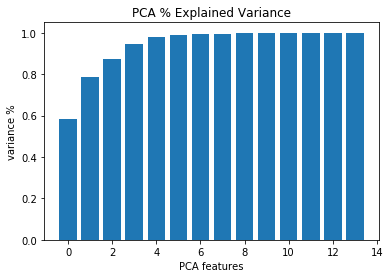

In [26]:
explained_var(pca) # first 2 components explains much higher than w crime

# KMeans with ACS+standardScaled crime

In [27]:
data = pd.read_csv('../data/Data_crimeStandardScaled.csv', index_col=0)
X_crimeStandardScaled = data.iloc[:, 2:]
X_crimeStandardScaled.head()

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_UnderBach,Edu_Bachelor,Edu_GradProf,Crime_Felony_scaled,Crime_Misdemeanor_scaled,Crime_Violation_scaled,Crime_Total_scaled
NTA,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,-0.197696,-0.178816,-0.245165,-0.190612
Bay Ridge,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,-0.184781,-0.148587,-0.117467,-0.157676
Bedford,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,-0.010826,-0.070053,0.007119,-0.045398
Bensonhurst East,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,-0.200053,-0.211325,-0.238025,-0.210532
Bensonhurst West,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,-0.206067,-0.215050,-0.263376,-0.216762


In [28]:
optimal_k = sil_score(X_crimeStandardScaled, K_CANDIDATES)

For n_clusters = 2 the average silhouette_score is: 0.9515863957940834
For n_clusters = 3 the average silhouette_score is: 0.34275637391221625
For n_clusters = 4 the average silhouette_score is: 0.3602647613054227
For n_clusters = 5 the average silhouette_score is: 0.35302243132547934
For n_clusters = 6 the average silhouette_score is: 0.34830512521579726
For n_clusters = 7 the average silhouette_score is: 0.2925811512241816
For n_clusters = 8 the average silhouette_score is: 0.3123909910375665
For n_clusters = 9 the average silhouette_score is: 0.3115527766569078

Optimal k=2


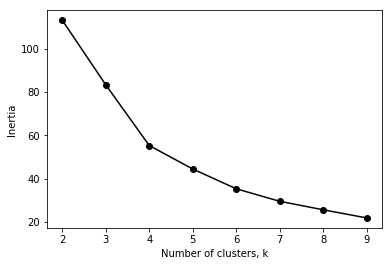

In [29]:
elbow(X_crimeStandardScaled, K_CANDIDATES) # k=4

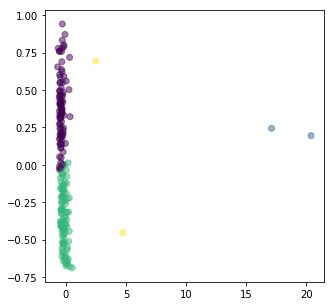

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

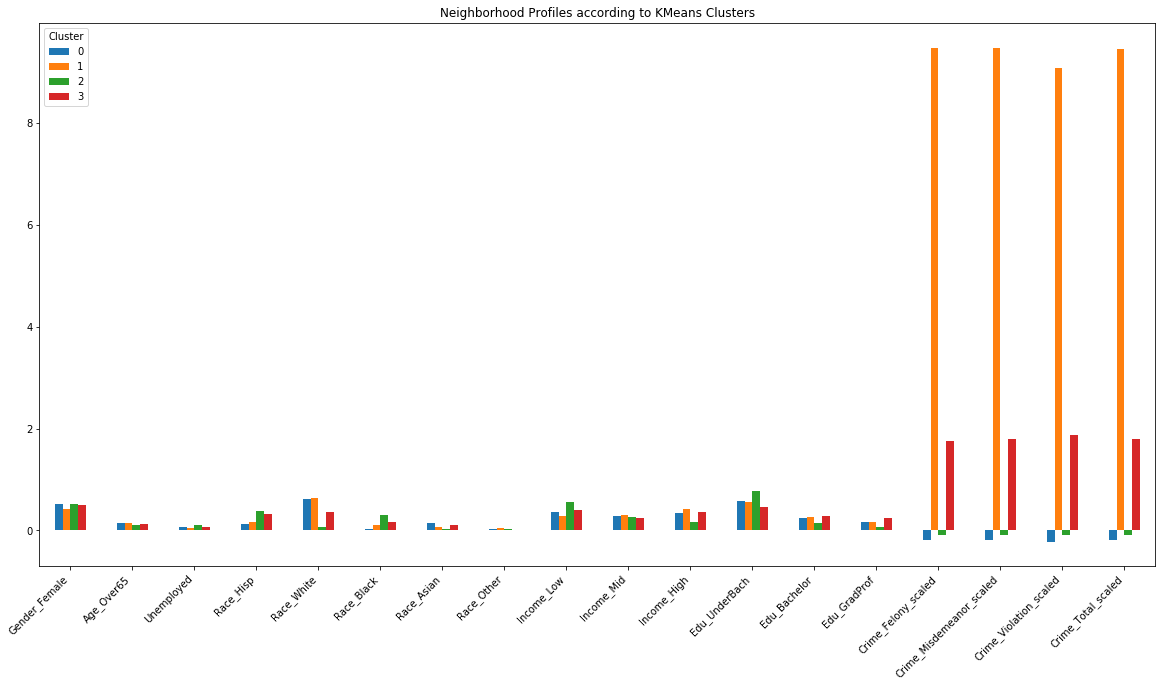

In [30]:
visualize_optimal_kmeans(X_crimeStandardScaled, 4)

# GMM and DBScan

In [31]:

from sklearn.mixture import GaussianMixture as GMM # You can import this only if you are using 0.18+ sklearn.

In [32]:
#trying gaussian & dbscan but not sure if correct
gmm = GMM(n_components=3).fit(acscrime1)
labels = gmm.predict(acscrime1)
plt.scatter(acscrime1.iloc[:,0],acscrime1.iloc[:,1],c=rr.labels_)

NameError: name 'acscrime1' is not defined

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
res2 = DBSCAN(eps=0.1, min_samples=3).fit(acscrime1)
L2=res2.labels_

In [ ]:
plt.scatter(acscrime1.iloc[:,0],acscrime1.iloc[:,1], c=L2, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')